In [428]:
!pip install folium

In [429]:
import pandas as pd
import folium

In [432]:
df1 = pd.read_excel('data3.xlsx', sheet_name = 0)
df1.head()

,lon,lat
0,127.044042,37.578016
1,127.054960,37.654506
2,127.164037,37.556472
3,127.106108,37.506508
4,126.905016,37.519944


In [433]:
data=pd.DataFrame({
    'lat':df1['lat'],
    'lon':df1['lon']
})
data.head()

,lat,lon
0,37.578016,127.044042
1,37.654506,127.054960
2,37.556472,127.164037
3,37.506508,127.106108
4,37.519944,126.905016


In [85]:
m = folium.Map(
    location=[37.335887,127.584063],
    zoom_start=15
)

for i in range(0,len(data)):
    folium.Circle(
    location=[data.iloc[i]['lat'],data.iloc[i]['lon']],
    radius=300,fill_color='#3186cc').add_to(m)   

In [87]:
df2 = pd.read_excel('보호구역.xlsx', sheet_name = 0)
df1.head()

,lon,lat
0,127.044042,37.578016
1,127.054960,37.654506
2,127.164037,37.556472
3,127.106108,37.506508
4,126.905016,37.519944


In [53]:
 for i in range(0,len(data)):
        folium.Circle(
            location=[data.iloc[i]['lon'],data.iloc[i]['lat']],
            radius=300).add_to(m)
m.save("out2.html") 

In [434]:
data2=pd.DataFrame({
    'lat':df2['lat'],
    'lon':df2['lon']
})
data.head()

,lat,lon
0,37.578016,127.044042
1,37.654506,127.054960
2,37.556472,127.164037
3,37.506508,127.106108
4,37.519944,126.905016


In [92]:
for i in range(0,len(data2)):
    folium.Circle(
    location=[data2.iloc[i]['lat'],data2.iloc[i]['lon']],
    radius=300,color='red').add_to(m)   
    
m.save("out6.html") 

In [95]:
df3 = pd.read_excel('교통사고 현황.xlsx', sheet_name = 0)
df3.head()

,연령층,시간대,발생건수,사망자수,부상자수,중상,경상,부상신고
0,12세이하,00시-02시,10,0,11,1,5,5
1,12세이하,02시-04시,19,0,21,4,10,7
2,12세이하,04시-06시,50,2,51,11,25,15
3,12세이하,06시-08시,32,0,35,11,13,11
4,12세이하,08시-10시,32,0,35,8,14,13


In [435]:
b=df3.groupby("연령층")["사망자수"].sum()/df3.groupby("연령층")["발생건수"].sum()
b

연령층
12세이하     0.004950
13-20세    0.016902
21-30세    0.018550
31-40세    0.017097
41-50세    0.018382
51-60세    0.019100
61-64세    0.023432
65세이상     0.036366
dtype: float64

In [ ]:
#폰트지정

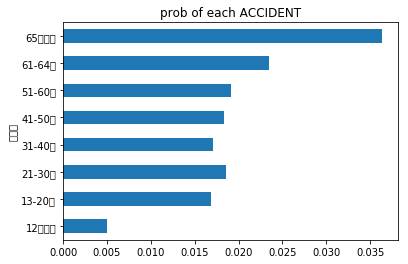

In [108]:
b.plot(kind="barh",title="prob of each ACCIDENT")

randomForest

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [110]:
forest = RandomForestClassifier(n_estimators=1000,oob_score=True)

In [128]:
df4 = pd.read_excel('서울시 교차로 관련 정보2.xls.xlsx', sheet_name = 0)
df4.head()

,교차로코드,입력일자,교차로명칭,유형코드,연동교차로코드,구코드 (공통);,지번,구경찰서 (공통);,신경찰서 (공통);,작업구분 (공통);,...,도로구분 (공통);,관할사업소 (공통);,교차로관리번호,공간데이터,신규정규화ID,이력ID,동코드 (공통);,공사형태 (공통);,지도표출구분,gubun
0,7130,,명덕초교입구(연등),2,2297,740,산40-3 임,310,310,1,...,,106,82-0000006800,NaN,6268134,6800,10700,,,1
1,7132,,우신고후문(연등),1,1562,530,86-4전,330,330,1,...,,104,82-0000006802,NaN,0194753,6802,11000,,,1
2,7134,,우리유앤미아파트(연등)2,1,5464,530,501-13도,330,330,1,...,,104,82-0000006804,NaN,1194891,6804,10200,,,1
3,7136,,낙성대역앞(연등),1,4494,620,산32-81 임,290,290,1,...,,105,82-0000006806,NaN,3140241,6806,10100,,,1
4,7137,,제일제당앞(연등),1,1431,530,609-23도,330,330,1,...,,104,82-0000006807,NaN,1185762,6807,10200,,,1


In [130]:
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(110,'종로구') 
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(140,'중구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(170,'용산구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(200,'성동구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(210,'광진구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(230,'동대문구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(260,'중랑구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(290,'성북구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(300,'강북구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(320,'도봉구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(350,'노원구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(380,'은평구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(410,'서대문구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(440,'마포구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(470,'양천구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(500,'강서구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(530,'구로구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(540,'금천구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(560,'영등포구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(590,'동작구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(620,'관악구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(650,'서초구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(680,'강남구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(710,'송파구')
df4['구코드 (공통);']=df4["구코드 (공통);"].replace(740,'강동구')

In [131]:
df4.head()

,교차로코드,입력일자,교차로명칭,유형코드,연동교차로코드,구코드 (공통);,지번,구경찰서 (공통);,신경찰서 (공통);,작업구분 (공통);,...,도로구분 (공통);,관할사업소 (공통);,교차로관리번호,공간데이터,신규정규화ID,이력ID,동코드 (공통);,공사형태 (공통);,지도표출구분,gubun
0,7130,,명덕초교입구(연등),2,2297,강동구,산40-3 임,310,310,1,...,,106,82-0000006800,NaN,6268134,6800,10700,,,1
1,7132,,우신고후문(연등),1,1562,구로구,86-4전,330,330,1,...,,104,82-0000006802,NaN,0194753,6802,11000,,,1
2,7134,,우리유앤미아파트(연등)2,1,5464,구로구,501-13도,330,330,1,...,,104,82-0000006804,NaN,1194891,6804,10200,,,1
3,7136,,낙성대역앞(연등),1,4494,관악구,산32-81 임,290,290,1,...,,105,82-0000006806,NaN,3140241,6806,10100,,,1
4,7137,,제일제당앞(연등),1,1431,구로구,609-23도,330,330,1,...,,104,82-0000006807,NaN,1185762,6807,10200,,,1


In [135]:
d=df4.groupby("구코드 (공통);")["gubun"].sum() #지역별 교차로수
d

구코드 (공통);
강남구     437
강동구     318
강북구     215
강서구     400
관악구     244
광진구     208
구로구     316
금천구     184
노원구     367
도봉구     209
동대문구    271
동작구     189
마포구     315
서대문구    232
서초구     380
성동구     217
성북구     297
송파구     447
양천구     367
영등포구    397
용산구     237
은평구     288
종로구     222
중구      194
중랑구     282
Name: gubun, dtype: int64

구별통과차량수


In [215]:
df5 = pd.read_excel('교통량2.xlsx', sheet_name = 0)
df5.head()

,Unnamed: 0,일자,요일,name,지점번호,방향,구분,X0시,X1시,X2시,...,X15시,X16시,X17시,X18시,X19시,X20시,X21시,X22시,X23시,sum
0,1,20190601,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,842.0,618.0,523.0,...,1967.0,1977.0,1960.0,1706.0,1227.0,1197.0,1309.0,1234.0,954.0,33236
1,2,20190602,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,617.0,511.0,421.0,...,1659.0,1530.0,1513.0,1348.0,1130.0,1168.0,1117.0,989.0,708.0,26604
2,3,20190603,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,467.0,306.0,223.0,...,1945.0,1958.0,2184.0,2126.0,1589.0,1406.0,1439.0,1459.0,945.0,36994
3,4,20190604,화,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,696.0,459.0,327.0,...,2110.0,2164.0,2238.0,2176.0,1662.0,1412.0,1544.0,1428.0,1018.0,38395
4,5,20190605,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,716.0,494.0,360.0,...,2085.0,2280.0,2417.0,2417.0,1949.0,1765.0,1590.0,1517.0,1075.0,39812


In [216]:
df5['name']=df5['name'].replace('성산로(금화터널)','서대문구') 
df5['name']=df5['name'].replace('사직로(사직터널)','종로구') 
df5['name']=df5['name'].replace('자하문로(자하문터널)','종로구') 
df5['name']=df5['name'].replace('대사관로(삼청터널)','용산구') 
df5['name']=df5['name'].replace('율곡로(안국역)','종로구') 
df5['name']=df5['name'].replace('창경궁로(서울여자대학교)','종로구')
df5['name']=df5['name'].replace('대학로(한국방송통신대학교)','종로구')
df5['name']=df5['name'].replace('종로(동묘앞역)','종로구') 

In [217]:
df5['name']=df5['name'].replace('동호로(장충체육관)','중구') 
df5['name']=df5['name'].replace('장충단로(장충단공원)','중구')
df5['name']=df5['name'].replace('퇴계로(회현역)','중구')
df5['name']=df5['name'].replace('퇴계로(신당역)','중구')
df5['name']=df5['name'].replace('새문안로(서울역사박물관)','종로구')
df5['name']=df5['name'].replace('종로(종로3가역)','종로구')
df5['name']=df5['name'].replace('서소문로(시청역)','중구')
df5['name']=df5['name'].replace('세종대로(시청역2)','중구') 
df5['name']=df5['name'].replace('세종대로(서울역)','중구')

In [218]:
df5['name']=df5['name'].replace('을지로(을지로3가역)','중구')
df5['name']=df5['name'].replace('칠패로(숭례문)','중구')
df5['name']=df5['name'].replace('남산1호터널','중구')
df5['name']=df5['name'].replace('남산2호터널','중구')
df5['name']=df5['name'].replace('남산3호터널','용산구')
df5['name']=df5['name'].replace('소월로(회현역)','용산구')
df5['name']=df5['name'].replace('소파로(숭의여자대학교)','중구')
df5['name']=df5['name'].replace('도봉로(도봉산역)','도봉구')
df5['name']=df5['name'].replace('아차산로(워커힐)','광진구')
df5['name']=df5['name'].replace('동일로(의정부IC)','노원구')

In [219]:
df5['name']=df5['name'].replace('망우로(망우리공원)','중랑구')
df5['name']=df5['name'].replace('경춘북로(중랑경찰서)','중랑구')
df5['name']=df5['name'].replace('화랑로(조선왕릉)','노원구')
df5['name']=df5['name'].replace('북부간선도로(신내IC)','성북구')
df5['name']=df5['name'].replace('서하남로(서하남IC)','강동구')
df5['name']=df5['name'].replace('천호대로(상일IC)','강동구')
df5['name']=df5['name'].replace('올림픽대로(강일IC)','강동구')
df5['name']=df5['name'].replace('경부고속도로(양재IC)','서초구')
df5['name']=df5['name'].replace('송파대로(복정역)','송파구')
df5['name']=df5['name'].replace('밤고개로(세곡동사거리)','강남구')
df5['name']=df5['name'].replace('분당수서로(성남시계)','강남구')
df5['name']=df5['name'].replace('과천대로(남태령역)','관악구')
df5['name']=df5['name'].replace('도봉로(도봉산역)','도봉구')
df5['name']=df5['name'].replace('양재대로(양재IC)','송파구')
df5['name']=df5['name'].replace('반포대로(우면산터널)','서초구')
df5['name']=df5['name'].replace('시흥대로(석수역)','금천구')
df5['name']=df5['name'].replace('금오로(광명시계)','금천구')
df5['name']=df5['name'].replace('오리로(광명시계)','금천구')
df5['name']=df5['name'].replace('개봉로(개봉교)','구로구')
df5['name']=df5['name'].replace('광명대교(광명시계)','금천구')
df5['name']=df5['name'].replace('금하로(광명시계)','금천구')
df5['name']=df5['name'].replace('오정로(부천시계)','강서구')
df5['name']=df5['name'].replace('화곡로(화곡로입구)','강서구')
df5['name']=df5['name'].replace('경인고속국도(신월IC)','양천구')
df5['name']=df5['name'].replace('경인로(유한공고)','영등포구')
df5['name']=df5['name'].replace('신정로(작동터널)','양천구')
df5['name']=df5['name'].replace('김포대로(개화교)','강서구')

In [220]:
df5['name']=df5['name'].replace('올림픽대로(개화IC)','강서구')
df5['name']=df5['name'].replace('통일로(고양시계)','은평구')
df5['name']=df5['name'].replace('서오릉로(고양시계)','은평구')
df5['name']=df5['name'].replace('수색로(고양시계)','서대문구')
df5['name']=df5['name'].replace('강변북로(난지한강공원)','광진구')
df5['name']=df5['name'].replace('강변북로(구리시계)','광진구')
df5['name']=df5['name'].replace('행주대교','강서구')
df5['name']=df5['name'].replace('가양대교','마포구')
df5['name']=df5['name'].replace('성산대교','마포구')
df5['name']=df5['name'].replace('양화대교','마포구')
df5['name']=df5['name'].replace('서강대교','마포구')
df5['name']=df5['name'].replace('마포대교','마포구')
df5['name']=df5['name'].replace('한강대교','용산구')
df5['name']=df5['name'].replace('성수대교','성동구')
df5['name']=df5['name'].replace('동작대교','동작구')
df5['name']=df5['name'].replace('잠수교','서초구')
df5['name']=df5['name'].replace('한남대교','강남구')
df5['name']=df5['name'].replace('동호대교','성동구')
df5['name']=df5['name'].replace('영동대교','성동구')
df5['name']=df5['name'].replace('청담대교','광진구')
df5['name']=df5['name'].replace('올림픽대교','광진구')
df5['name']=df5['name'].replace('진흥로(구기터널)','은평구')
df5['name']=df5['name'].replace('평창문화로(북악터널)','종로구')
df5['name']=df5['name'].replace('동호로(금호터널)','중구')
df5['name']=df5['name'].replace('서빙고로(한남역)','용산구')
df5['name']=df5['name'].replace('천호대교(군자교)','송파구')
df5['name']=df5['name'].replace('동일로(군자교)','노원구')
df5['name']=df5['name'].replace('화랑로(상월곡역)','노원구')
df5['name']=df5['name'].replace('동소문로(길음교사거리)','성북구')
df5['name']=df5['name'].replace('화랑로(화랑대역)','노원구')
df5['name']=df5['name'].replace('도봉로(쌍문역)','강북구')
df5['name']=df5['name'].replace('동부간선도로(월계1교)','송파구')
df5['name']=df5['name'].replace('북부간선로','성북구')

In [221]:
df5['name']=df5['name'].replace('동일교(노원역)','노원구')
df5['name']=df5['name'].replace('증산로(디지털미디어시티역)','은평구')
df5['name']=df5['name'].replace('통일로(산골고개정류장)','은평구')
df5['name']=df5['name'].replace('성산로(연희IC)','서대문구')
df5['name']=df5['name'].replace('연희로(연희IC)','서대문구')
df5['name']=df5['name'].replace('남부순환로(화곡로입구 교차로)','서초구')
df5['name']=df5['name'].replace('남부순환로(신월IC)','서초구')
df5['name']=df5['name'].replace('강서로(신월IC)','서초구')
df5['name']=df5['name'].replace('강서로(화곡터널)','강서구')
df5['name']=df5['name'].replace('공항대로(발산역)','강서구')
df5['name']=df5['name'].replace('경인로(오류IC)','영등포구')
df5['name']=df5['name'].replace('경인로(거리공원입구교차로)','영등포구')
df5['name']=df5['name'].replace('시흥대로(시흥IC)','금천구')
df5['name']=df5['name'].replace('영등포로(오목교)','영등포구')
df5['name']=df5['name'].replace('시흥대로(구로디지털지역)','금천구')
df5['name']=df5['name'].replace('국회대로(여의2교)','마포구')
df5['name']=df5['name'].replace('경인로(서울교)','영등포구')
df5['name']=df5['name'].replace('여의대방로(여의교)','영등포구')
df5['name']=df5['name'].replace('양녕로(상도터널)','동작구')
df5['name']=df5['name'].replace('동작대로(총신대입구역)','동작구')
df5['name']=df5['name'].replace('문성로(난곡터널)','관악구')
df5['name']=df5['name'].replace('남부순환로(낙성대역)','서초구')
df5['name']=df5['name'].replace('남부순환로(예술의 전당)','서초구')
df5['name']=df5['name'].replace('강남대로(강남역-신분당)','강남구')
df5['name']=df5['name'].replace('사평대로(고속터미널)','강남구')
df5['name']=df5['name'].replace('반포대로(서초역)','서초구')
df5['name']=df5['name'].replace('언주로(매봉터널)','강남구')
df5['name']=df5['name'].replace('남부순환로(수서IC)','강남구')
df5['name']=df5['name'].replace('헌릉로(세곡동사거리)','강남구')
df5['name']=df5['name'].replace('노들로','영등포구')
df5['name']=df5['name'].replace('테헤란로(신사역)','강남구')
df5['name']=df5['name'].replace('강남대로(신사역)','강남구')
df5['name']=df5['name'].replace('백제고분로(종합운동장)','송파구')
df5['name']=df5['name'].replace('송파대로(송파역)','송파구')
df5['name']=df5['name'].replace('올림픽대로','송파구')
df5['name']=df5['name'].replace('강변북로','광진구')
df5['name']=df5['name'].replace('내부순환로','마포구')
df5['name']=df5['name'].replace('북부산선로','성북구')
df5['name']=df5['name'].replace('동부간선도로','동대문구')
df5['name']=df5['name'].replace('경부고속도로','서초구')
df5['name']=df5['name'].replace('분당수서로','강남구')
df5['name']=df5['name'].replace('서부간선도로','금천구')

In [222]:
df5['name']=df5['name'].replace('강남순환로','금천구')
df5['name']=df5['name'].replace('광진교','강동구')
df5['name']=df5['name'].replace('금천교(광명시계)','금천구')
df5['name']=df5['name'].replace('남부순환로(예술의전당)','강서구')
df5['name']=df5['name'].replace('동일로(노원역)','노원구')
df5['name']=df5['name'].replace('뚝섬로(용비교)','성동구')
df5['name']=df5['name'].replace('반포대교','서초구')
df5['name']=df5['name'].replace('사평대로(고속터미널역)','강남구')
df5['name']=df5['name'].replace('시흥대로(구로디지털단지역)','금천구')
df5['name']=df5['name'].replace('원효대교','영등포구')
df5['name']=df5['name'].replace('잠실대교','광진구')
df5['name']=df5['name'].replace('천호대교','송파구')
df5['name']=df5['name'].replace('천호대로(군자교)','동대문구')
df5['name']=df5['name'].replace('철산교(광명시계)','구로구')
df5['name']=df5['name'].replace('테헤란로(선릉역)','강남구')

In [223]:
df5.head()

,Unnamed: 0,일자,요일,name,지점번호,방향,구분,X0시,X1시,X2시,...,X15시,X16시,X17시,X18시,X19시,X20시,X21시,X22시,X23시,sum
0,1,20190601,토,서대문구,A-01,유입,봉원고가차도->독립문역,842.0,618.0,523.0,...,1967.0,1977.0,1960.0,1706.0,1227.0,1197.0,1309.0,1234.0,954.0,33236
1,2,20190602,일,서대문구,A-01,유입,봉원고가차도->독립문역,617.0,511.0,421.0,...,1659.0,1530.0,1513.0,1348.0,1130.0,1168.0,1117.0,989.0,708.0,26604
2,3,20190603,월,서대문구,A-01,유입,봉원고가차도->독립문역,467.0,306.0,223.0,...,1945.0,1958.0,2184.0,2126.0,1589.0,1406.0,1439.0,1459.0,945.0,36994
3,4,20190604,화,서대문구,A-01,유입,봉원고가차도->독립문역,696.0,459.0,327.0,...,2110.0,2164.0,2238.0,2176.0,1662.0,1412.0,1544.0,1428.0,1018.0,38395
4,5,20190605,수,서대문구,A-01,유입,봉원고가차도->독립문역,716.0,494.0,360.0,...,2085.0,2280.0,2417.0,2417.0,1949.0,1765.0,1590.0,1517.0,1075.0,39812


In [224]:
e=df5.groupby("name")["sum"].sum()
e

name
강남구     29055275
강동구      9440550
강북구      1361065
강서구     15043017
관악구      2400302
광진구     26912954
구로구       647586
금천구     17405358
노원구     11171620
도봉구      1562386
동대문구     5434309
동작구      6666398
마포구     22949784
서대문구     6674782
서초구     24840401
성동구     10301863
성북구      7611248
송파구     21783349
양천구      6438009
영등포구    14379419
용산구      4462500
은평구      8186370
종로구     11425892
중구      16562750
중랑구      2428116
Name: sum, dtype: int64

In [203]:
e.to_csv("C:/Users/user/Desktop/공공데이터2/new_data2.csv",header=True,index=False) #csv 파일로 저장 

용도혼합도 계산

In [226]:
df6 = pd.read_excel('용도혼합도2.xlsx', sheet_name = 0)
df6.head()

,지역,주거지역 비율,상업지역 비율,준공업지역,녹지지역 비율
0,종로구,41.01,12.25,0.00,46.74
1,중구,60.53,39.22,0.00,0.25
2,용산구,51.89,7.07,0.00,41.04
3,성동구,59.20,2.82,12.21,25.78
4,광진구,67.93,1.18,0.00,30.89


In [234]:
f=(abs(df6['주거지역 비율']-1/4)+abs(df6['상업지역 비율']-1/4)+abs(df6['준공업지역']-1/4)+abs(df6['녹지지역 비율']-1/4))/3/2
f

0     16.583333
1     16.583333
2     16.583333
3     16.501667
4     16.583333
5     16.583333
6     16.583333
7     16.583333
8     16.583333
9     16.500000
10    16.583333
11    16.583333
12    16.583333
13    16.583333
14    16.498333
15    16.500000
16    16.500000
17    16.500000
18    16.500000
19    16.581667
20    16.583333
21    16.581667
22    16.583333
23    16.581667
24    16.583333
dtype: float64

In [233]:
f.to_csv("C:/Users/user/Desktop/공공데이터2/new_data2.csv",header=True,index=False) #csv 파일로 저장 

랜덤포레스트-변수중요도 확인


In [333]:
df7 = pd.read_excel('분석변수1.xlsx', sheet_name = 0) #분석변수
df7.head()

,gubun,면적,노인인구수,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,용도혼합도,통행속도
0,종로구,23.91,24950,7950,23872,30972,212238,222,11425892,16.583333,NaN
1,중구,9.96,20388,9002,16722,20006,68502,194,16562750,16.583333,NaN
2,용산구,21.87,35547,11678,43227,27838,197936,237,4462500,16.583333,NaN
3,성동구,16.86,39140,4370,21185,48600,334184,217,10301863,16.501667,NaN
4,광진구,17.06,41292,3700,30458,23288,266791,208,26912954,16.583333,NaN


In [334]:
g=df7['노인인구수']/df7['면적']
g=pd.DataFrame({'노인밀도':g})
g.head()

,노인밀도
0,1043.496445
1,2046.987952
2,1625.377229
3,2321.470937
4,2420.398593


In [335]:
df8=pd.concat([df7,g],axis=1)

In [336]:
df8.head()

,gubun,면적,노인인구수,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,용도혼합도,통행속도,노인밀도
0,종로구,23.91,24950,7950,23872,30972,212238,222,11425892,16.583333,NaN,1043.496445
1,중구,9.96,20388,9002,16722,20006,68502,194,16562750,16.583333,NaN,2046.987952
2,용산구,21.87,35547,11678,43227,27838,197936,237,4462500,16.583333,NaN,1625.377229
3,성동구,16.86,39140,4370,21185,48600,334184,217,10301863,16.501667,NaN,2321.470937
4,광진구,17.06,41292,3700,30458,23288,266791,208,26912954,16.583333,NaN,2420.398593


In [337]:
df8=df8.drop(["면적","노인인구수","통행속도"],axis=1)
df8.head()

,gubun,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,용도혼합도,노인밀도
0,종로구,7950,23872,30972,212238,222,11425892,16.583333,1043.496445
1,중구,9002,16722,20006,68502,194,16562750,16.583333,2046.987952
2,용산구,11678,43227,27838,197936,237,4462500,16.583333,1625.377229
3,성동구,4370,21185,48600,334184,217,10301863,16.501667,2321.470937
4,광진구,3700,30458,23288,266791,208,26912954,16.583333,2420.398593


종속변수 계산

In [338]:
df9 = pd.read_excel('보행노인_서울3.xlsx', sheet_name = 0) #종속변수
df9.head()

,다발지식별자,names,법정동코드,스팟코드,관할경찰서,gubun,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,138697.0,2013098.0,1.153010e+09,11530001.0,서울특별시 구로구1,구로구,3.0,3.0,0.0,2.0,1.0,0.0,126.892436,37.485933,"{""type"":""Polygon"",""coordinates"":[[[126.8940346..."
1,194243.0,2014105.0,1.111014e+09,11110002.0,서울특별시 종로구2,종로구,4.0,4.0,3.0,1.0,0.0,0.0,126.989159,37.570290,"{""type"":""Polygon"",""coordinates"":[[[126.9907593..."
2,194247.0,2014105.0,1.114016e+09,11140002.0,서울특별시 중구2,중구,5.0,6.0,0.0,5.0,1.0,0.0,127.010617,37.554635,"{""type"":""Polygon"",""coordinates"":[[[127.012218,..."
3,194246.0,2014105.0,1.114012e+09,11140001.0,서울특별시 중구1,중구,5.0,5.0,1.0,3.0,1.0,0.0,126.972527,37.555556,"{""type"":""Polygon"",""coordinates"":[[[126.9741275..."
4,194249.0,2014105.0,1.117011e+09,11170001.0,서울특별시 용산구1,용산구,5.0,5.0,0.0,3.0,1.0,1.0,126.961478,37.535575,"{""type"":""Polygon"",""coordinates"":[[[126.9630784..."


In [339]:
f=pd.DataFrame(df9.groupby("gubun")["발생건수"].sum())
f

,발생건수
gubun,
강남구,37.0
강동구,107.0
강북구,174.0
강서구,111.0
관악구,210.0
광진구,60.0
구로구,131.0
금천구,75.0
노원구,96.0


In [342]:
df10=pd.merge(df8,f,on='gubun')
df10

,gubun,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,용도혼합도,노인밀도,발생건수
0,종로구,7950,23872,30972,212238,222,11425892,16.583333,1043.496445,109.0
1,중구,9002,16722,20006,68502,194,16562750,16.583333,2046.987952,132.0
2,용산구,11678,43227,27838,197936,237,4462500,16.583333,1625.377229,57.0
3,성동구,4370,21185,48600,334184,217,10301863,16.501667,2321.470937,93.0
4,광진구,3700,30458,23288,266791,208,26912954,16.583333,2420.398593,60.0
5,동대문구,4300,35819,34780,252483,271,5434309,16.583333,3748.312236,316.0
6,중랑구,0,32390,45815,255808,282,2428116,16.583333,3018.486486,148.0
7,성북구,1744,29654,47746,548270,297,7611248,16.583333,2598.779496,199.0
8,강북구,0,15650,30168,180896,215,1361065,16.583333,2286.610169,174.0
9,도봉구,5900,17075,24716,209740,209,1562386,16.500000,2441.509434,99.0


In [351]:
df10.to_excel("final3.xlsx",header=True,sheet_name='sheet1') #csv 파일로 저장 

선형회귀분석을 통한 feature selection 후 다른 모델로 결과 해석하기

선형회귀로 변수 선정은 r로 확인

In [10]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

In [451]:
df10_train=df10[0:70]
df10_test=df10[71:100]

In [452]:
df10.columns

Index(['gubun', '광로(40m이상)', '대로(25∼40m미만)', '중로(12∼25미만m)', '소로(12m미만)',
       '교차로수', '교통량', '용도혼합도', '노인밀도', '발생건수', 'mean'],
      dtype='object')

의사결정 트리

In [12]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
df11 = pd.read_excel('final7.xlsx', sheet_name = 0)
df11.head()

,대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,target,통행속도
0,23872,30972,212238,222,11425892,109,24.781993
1,16722,20006,68502,194,16562750,132,22.738787
2,43227,27838,197936,237,4462500,57,31.448097
3,21185,48600,334184,217,10301863,93,31.348752
4,30458,23288,266791,208,26912954,60,31.320888


In [14]:
labels = np.array(df11['target'])
features = df11.drop(['target'], axis=1)

In [15]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [16]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(train_features, train_labels)
clf.predict(test_features)

array([132., 210., 132.,  37., 316., 132.,  47.])

In [17]:
dtree = tree.DecisionTreeRegressor(criterion='mse',max_depth=5, random_state=0)
dtree.fit(train_features, train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [18]:
from sklearn.externals.six import StringIO   #시각화
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)

In [19]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [20]:
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [21]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [22]:
from PIL import Image

In [23]:
pip install GraphViz

Note: you may need to restart the kernel to use updated packages.


In [24]:
graph.write_png("dtree.png")

InvocationException: GraphViz's executables not found

In [444]:
df12 = pd.read_excel('2019년 06월 서울시 차량통행속도3.xlsx', sheet_name = 0)
df12.head()

,gubun,01시,02시,03시,04시,05시,06시,07시,08시,09시,...,16시,17시,18시,19시,20시,21시,22시,23시,24시,mean
0,강북구,43.11,26.95,50.06,57.75,69.93,41.73,38.72,34.19,28.55,...,36.06,52.63,46.27,33.26,37.66,30.66,47.32,46.92,49.57,41.572500
1,강북구,18.93,18.49,24.48,25.00,25.73,19.46,18.86,17.60,12.33,...,9.66,12.50,12.34,12.84,14.38,14.55,18.37,16.99,17.75,16.523333
2,강북구,25.69,25.88,29.10,31.28,35.31,32.32,26.06,22.90,25.28,...,21.90,22.32,21.67,21.25,21.07,19.25,20.21,22.79,27.11,24.267917
3,강북구,47.97,40.48,44.39,65.45,86.19,50.99,45.56,36.91,47.79,...,43.53,61.53,60.40,47.24,49.73,45.53,48.78,50.48,39.41,49.654167
4,송파구,29.45,20.99,19.61,22.91,18.33,27.43,25.67,17.83,17.28,...,13.18,16.59,16.88,16.66,19.24,13.89,20.71,17.19,20.23,19.255833


In [461]:
j=pd.DataFrame(df12.groupby("gubun")["mean"].mean())
j

,mean
gubun,
강남구,29.942561
강동구,27.025055
강북구,23.637971
강서구,28.592308
관악구,30.616897
광진구,31.320888
구로구,28.600880
금천구,28.973296
노원구,27.998543


In [450]:
df10=pd.merge(df10,j,on='gubun')
df10

,gubun,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,용도혼합도,노인밀도,발생건수,mean
0,종로구,7950,23872,30972,212238,222,11425892,16.583333,1043.496445,109.0,24.781993
1,중구,9002,16722,20006,68502,194,16562750,16.583333,2046.987952,132.0,22.738787
2,용산구,11678,43227,27838,197936,237,4462500,16.583333,1625.377229,57.0,31.448097
3,성동구,4370,21185,48600,334184,217,10301863,16.501667,2321.470937,93.0,31.348752
4,광진구,3700,30458,23288,266791,208,26912954,16.583333,2420.398593,60.0,31.320888
5,동대문구,4300,35819,34780,252483,271,5434309,16.583333,3748.312236,316.0,26.858635
6,중랑구,0,32390,45815,255808,282,2428116,16.583333,3018.486486,148.0,26.302593
7,성북구,1744,29654,47746,548270,297,7611248,16.583333,2598.779496,199.0,27.544975
8,강북구,0,15650,30168,180896,215,1361065,16.583333,2286.610169,174.0,23.637971
9,도봉구,5900,17075,24716,209740,209,1562386,16.500000,2441.509434,99.0,24.557140


In [478]:
df11.to_csv("C:/Users/user/Desktop/공공데이터2/last.csv",header=True,index=False) #csv 파일로 저장 

In [462]:
df11=df10
df11.head()

,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),교차로수,교통량,용도혼합도,노인밀도,발생건수,mean
0,7950,23872,30972,212238,222,11425892,16.583333,1043.496445,109.0,24.781993
1,9002,16722,20006,68502,194,16562750,16.583333,2046.987952,132.0,22.738787
2,11678,43227,27838,197936,237,4462500,16.583333,1625.377229,57.0,31.448097
3,4370,21185,48600,334184,217,10301863,16.501667,2321.470937,93.0,31.348752
4,3700,30458,23288,266791,208,26912954,16.583333,2420.398593,60.0,31.320888
